In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs

import h5py

In [2]:
import xarray as xr

In [3]:
ds = xr.open_dataset("rsut_.nc")

/opt/anaconda3/envs/ds/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'rsut' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [8]:
ds

<xarray.Dataset>
Dimensions:    (time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    rsut       (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (lat, nbnd) float32 -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
    lon_bnds   (lon, nbnd) float32 -0.625 0.625 0.625 ... 358.1 358.1 359.4
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T22:07:50Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

In [9]:
# variables are in our dataset
ds.data_vars

Data variables:
    rsut       (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (lat, nbnd) float32 -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
    lon_bnds   (lon, nbnd) float32 -0.625 0.625 0.625 ... 358.1 358.1 359.4

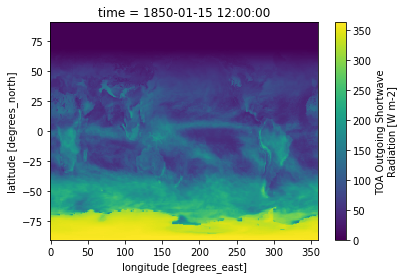

In [13]:
ds.rsut[0].plot()

In [14]:
ds.dims

Frozen({'time': 1980, 'lat': 192, 'lon': 288, 'nbnd': 2})

In [15]:
# dataset coordinates
ds.coords

Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

In [17]:
# dataset global attributes
#ds.attrs

In [21]:
# dataarray/variable attributes
ds.rsut.attrs

{'cell_measures': 'area: areacella',
 'cell_methods': 'area: time: mean',
 'comment': 'at the top of the atmosphere',
 'description': 'at the top of the atmosphere',
 'frequency': 'mon',
 'id': 'rsut',
 'long_name': 'TOA Outgoing Shortwave Radiation',
 'mipTable': 'Amon',
 'out_name': 'rsut',
 'positive': 'up',
 'prov': 'Amon ((isd.003))',
 'realm': 'atmos',
 'standard_name': 'toa_outgoing_shortwave_flux',
 'time': 'time',
 'time_label': 'time-mean',
 'time_title': 'Temporal mean',
 'title': 'TOA Outgoing Shortwave Radiation',
 'type': 'real',
 'units': 'W m-2',
 'variable_id': 'rsut'}

In [20]:
# The actual (numpy) array data
ds.rsut.data

array([[[361.3679   , 361.3679   , 361.3679   , ..., 361.3679   ,
         361.36786  , 361.3679   ],
        [359.71542  , 359.7776   , 359.85275  , ..., 359.96445  ,
         359.92792  , 359.8004   ],
        [359.88376  , 359.86212  , 359.9203   , ..., 360.17987  ,
         360.15787  , 359.9513   ],
        ...,
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ],
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ],
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ]],

       [[226.168    , 226.168    , 226.168    , ..., 226.168    ,
         226.168    , 226.168    ],
        [225.71727  , 225.70895  , 225.71007  , ..., 225.78229  ,
         225.77667  , 225.77669  ],
        [224.65477  , 224.63594  , 224.59868  , ..., 224.6734   ,
         224.68213  , 224.68123  ],
        ...,
        [  0.       ,   0.       ,   0.       , ...,  

In [22]:
# extracting a coordinate variable
ds.rsut.lon

<xarray.DataArray 'lon' (lon: 288)>
array([  0.  ,   1.25,   2.5 , ..., 356.25, 357.5 , 358.75])
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    axis:           X
    bounds:         lon_bnds
    standard_name:  longitude
    title:          Longitude
    type:           double
    units:          degrees_east
    valid_max:      360.0
    valid_min:      0.0

In [23]:
ds.rsut.lat

<xarray.DataArray 'lat' (lat: 192)>
array([-90.      , -89.057592, -88.115183, -87.172775, -86.230366, -85.287958,
       -84.34555 , -83.403141, -82.460733, -81.518325, -80.575916, -79.633508,
       -78.691099, -77.748691, -76.806283, -75.863874, -74.921466, -73.979058,
       -73.036649, -72.094241, -71.151832, -70.209424, -69.267016, -68.324607,
       -67.382199, -66.439791, -65.497382, -64.554974, -63.612565, -62.670157,
       -61.727749, -60.78534 , -59.842932, -58.900524, -57.958115, -57.015707,
       -56.073298, -55.13089 , -54.188482, -53.246073, -52.303665, -51.361257,
       -50.418848, -49.47644 , -48.534031, -47.591623, -46.649215, -45.706806,
       -44.764398, -43.82199 , -42.879581, -41.937173, -40.994764, -40.052356,
       -39.109948, -38.167539, -37.225131, -36.282723, -35.340314, -34.397906,
       -33.455497, -32.513089, -31.570681, -30.628272, -29.685864, -28.743455,
       -27.801047, -26.858639, -25.91623 , -24.973822, -24.031414, -23.089005,
       -22.146597, -21.204188, -20.26178 , -19.319372, -18.376963, -17.434555,
       -16.492147, -15.549738, -14.60733 , -13.664921, -12.722513, -11.780105,
       -10.837696,  -9.895288,  -8.95288 ,  -8.010471,  -7.068063,  -6.125654,
        -5.183246,  -4.240838,  -3.298429,  -2.356021,  -1.413613,  -0.471204,
         0.471204,   1.413613,   2.356021,   3.298429,   4.240838,   5.183246,
         6.125654,   7.068063,   8.010471,   8.95288 ,   9.895288,  10.837696,
        11.780105,  12.722513,  13.664921,  14.60733 ,  15.549738,  16.492147,
        17.434555,  18.376963,  19.319372,  20.26178 ,  21.204188,  22.146597,
        23.089005,  24.031414,  24.973822,  25.91623 ,  26.858639,  27.801047,
        28.743455,  29.685864,  30.628272,  31.570681,  32.513089,  33.455497,
        34.397906,  35.340314,  36.282723,  37.225131,  38.167539,  39.109948,
        40.052356,  40.994764,  41.937173,  42.879581,  43.82199 ,  44.764398,
        45.706806,  46.649215,  47.591623,  48.534031,  49.47644 ,  50.418848,
        51.361257,  52.303665,  53.246073,  54.188482,  55.13089 ,  56.073298,
        57.015707,  57.958115,  58.900524,  59.842932,  60.78534 ,  61.727749,
        62.670157,  63.612565,  64.554974,  65.497382,  66.439791,  67.382199,
        68.324607,  69.267016,  70.209424,  71.151832,  72.094241,  73.036649,
        73.979058,  74.921466,  75.863874,  76.806283,  77.748691,  78.691099,
        79.633508,  80.575916,  81.518325,  82.460733,  83.403141,  84.34555 ,
        85.287958,  86.230366,  87.172775,  88.115183,  89.057592,  90.      ])
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Attributes:
    axis:           Y
    bounds:         lat_bnds
    standard_name:  latitude
    title:          Latitude
    type:           double
    units:          degrees_north
    valid_max:      90.0
    valid_min:      -90.0

In [24]:
# extracting a coorindate variable from .coords
ds.coords["time"]

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 15, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 2, 14, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 3, 15, 12, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2014, 10, 15, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2014, 11, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2014, 12, 15, 12, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    title:          time
    type:           double

In [28]:
# select one time slice
ds.rsut[0]

<xarray.DataArray 'rsut' (lat: 192, lon: 288)>
array([[361.3679 , 361.3679 , 361.3679 , ..., 361.3679 , 361.36786, 361.3679 ],
       [359.71542, 359.7776 , 359.85275, ..., 359.96445, 359.92792, 359.8004 ],
       [359.88376, 359.86212, 359.9203 , ..., 360.17987, 360.15787, 359.9513 ],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,   0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,   0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,   0.     ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    time     object 1850-01-15 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        at the top of the atmosphere
    description:    at the top of the atmosphere
    frequency:      mon
    id:             rsut
    long_name:      TOA Outgoing Shortwave Radiation
    mipTable:       Amon
    out_name:       rsut
    positive:       up
    prov:           Amon ((isd.003))
    realm:          atmos
    standard_name:  toa_outgoing_shortwave_flux
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          TOA Outgoing Shortwave Radiation
    type:           real
    units:          W m-2
    variable_id:    rsut

In [38]:
## Select one time slice and change to numpy array

np_rsut = ds.rsut[0].data

In [39]:
np_rsut.shape

(192, 288)

In [40]:
np_rsut

array([[361.3679 , 361.3679 , 361.3679 , ..., 361.3679 , 361.36786,
        361.3679 ],
       [359.71542, 359.7776 , 359.85275, ..., 359.96445, 359.92792,
        359.8004 ],
       [359.88376, 359.86212, 359.9203 , ..., 360.17987, 360.15787,
        359.9513 ],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ]], dtype=float32)

In [32]:
lon_ = np.arange(288)/288*360
lat_ = np.arange(192)/192*180-90
lon, lat = np.meshgrid(lon_, lat_)

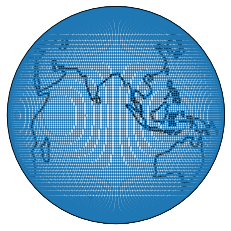

In [42]:
# Figure

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(90, 0))
ax.set_global()
ax.coastlines(linewidth=2)

scat1 = plt.scatter(lon, lat, s=1, rasterized=True, transform=ccrs.PlateCarree())
